#**World Economic report**





In [77]:
#Prepare & QA the Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


worldbank = pd.read_excel('WorldBank.xlsx')
hdi = pd.read_csv('HDI.csv')


In [70]:
# Use "GDP" and "GDP per Capita" to calculate population in millions and create a "Population (M)" column.

worldbank['Population (M)'] = (worldbank['GDP (USD)'] / worldbank['GDP per capita (USD)']) / 1_000_000


In [43]:
print(worldbank['Population (M)'])

0        37.172416
1        36.296472
2        35.383058
3        34.413604
4        33.370856
           ...    
12444     4.322868
12445     4.178722
12446     4.039198
12447     3.905033
12448     3.776677
Name: Population (M), Length: 12449, dtype: float64


In [72]:
#Perform basic profiling & QA on the data.

worldbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [73]:
#Perform basic profiling & QA on the data

worldbank.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
count,12449.00000,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000,9575.000000
mean,1989.00000,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079,29.956728
std,17.03007,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703,115.803824
min,1960.00000,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000,0.008913
25%,1974.00000,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000,1.051937
50%,1989.00000,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000,5.390515
75%,2004.00000,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250,17.075158
max,2018.00000,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000,1391.895280


In [74]:
# Filter the data to 2014 and join it with the HDI csv file on "Country Code".
worldbank_2014 = worldbank[worldbank['Year'] == 2014] 

# Perform a merge on the 'Country Code' column
merged_data = pd.merge(worldbank_2014, hdi, on='Country Code', how='inner')


merged_data


,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.370,1.322820e+10,4578.670,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.870,2.140000e+11,5493.060,...,9.41,9.38,9.52,9.57,9.35,9.13,11.50,11.21,11.21,11.21
3,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Sub-Saharan Africa,Upper middle income,2014,43.182,9.454,312.229,1.460000e+11,5408.410,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,VNM,East Asia & Pacific,Lower middle income,2014,17.315,6.060,1423.690,1.860000e+11,2030.260,...,8.51,7.80,9.85,10.03,8.09,8.16,8.12,8.52,8.52,8.52
188,West Bank and Gaza,PSE,Middle East & North Africa,Lower middle income,2014,31.885,3.495,NaN,1.271560e+10,3046.820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,2014,32.735,5.974,219.800,4.322860e+10,1674.000,...,3.66,3.60,3.55,3.39,3.48,3.06,2.84,2.89,2.89,2.89
190,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2014,38.645,7.565,717.349,2.715060e+10,1763.060,...,4.74,4.68,3.92,3.36,3.12,3.21,2.80,2.38,2.38,2.38


In [75]:
# Prepare the data for visualization

## Create a "gdp_pivot" table with years as rows, regions as columns, sum of GDP as values.

gdp_pivot = worldbank.pivot_table(
    values='GDP (USD)',      # Column with GDP values
    index='Year',            # Rows will be the years
    columns='Region',        # Columns will be the regions
    aggfunc='sum'            # Sum up GDP values
)

gdp_pivot


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,1.464117e+11,2.834935e+11,5.739654e+10,1.410025e+10,5.430845e+11,4.746783e+10,2.648878e+10
1961,1.466530e+11,3.017402e+11,6.076987e+10,1.480286e+10,6.046452e+11,5.062976e+10,2.753489e+10
1962,1.499092e+11,3.299221e+11,9.396297e+10,1.464985e+10,6.479622e+11,5.403093e+10,2.984425e+10
1963,1.672525e+11,3.638093e+11,9.482963e+10,1.646011e+10,6.848096e+11,6.077062e+10,3.419779e+10
1964,1.921179e+11,4.028910e+11,1.056766e+11,1.817288e+10,7.362342e+11,6.960261e+10,3.338035e+10
1965,2.144490e+11,4.386810e+11,1.139804e+11,2.611757e+10,7.994565e+11,7.478651e+10,3.717036e+10
1966,2.401298e+11,4.765834e+11,1.250137e+11,2.746476e+10,8.771494e+11,6.283008e+10,4.015541e+10
1967,2.654626e+11,5.117755e+11,1.283074e+11,2.945478e+10,9.288200e+11,6.916707e+10,3.996272e+10
1968,2.924137e+11,5.349067e+11,1.381940e+11,3.976427e+10,1.016070e+12,7.260618e+10,4.273677e+10


In [44]:
# Create "pop_pivot" table with years as rows, regions as columns, and sum of population as values.

pop_pivot = worldbank.pivot_table(
    values='Population (M)',     # Column with population values
    index='Year',            # Rows will be the years
    columns='Region',        # Columns will be the regions
    aggfunc='sum'            # Sum up population values
)

pop_pivot

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,872.149068,280.746688,186.852628,59.303286,180.615844,572.526561,168.518542
1961,871.192827,283.656647,192.312725,60.945298,201.909874,584.618194,172.577530
1962,881.036241,286.741448,219.093142,62.667579,205.167974,597.165027,177.066655
1963,902.065879,289.789614,225.199250,64.416446,208.372005,610.162283,181.468995
1964,922.572657,292.833206,231.411905,66.231025,211.318874,623.598506,186.049084
1965,944.236257,295.961899,243.079229,96.974833,214.109329,637.466544,190.810506
1966,969.207339,298.761668,249.599177,99.672074,216.658880,651.777934,196.183345
1967,1098.546499,301.127234,256.195659,102.508830,219.245001,666.530892,207.059324
1968,1125.326399,304.291355,262.866766,120.000003,221.609644,681.713759,212.492378


In [76]:
#Create "wb_hdi_by_region" table by calculating the average HDI for each region and sorting from highest average HDI to lowest.

# Calculate the average HDI for each region from the merged data
wb_hdi_by_region = merged_data.groupby('region')['hdi_rank_2021'].mean().reset_index()

# Rename columns for clarity
wb_hdi_by_region.columns = ['Region', 'Average HDI']

# Sort the DataFrame from highest to lowest average HDI
wb_hdi_by_region = wb_hdi_by_region.sort_values(by='Average HDI', ascending=False)

print(wb_hdi_by_region)


  Region  Average HDI
5    SSA   157.847826
4     SA   123.444444
1    EAP   107.954545
0     AS    98.473684
3    LAC    91.848485
2    ECA    77.823529


<Figure size 1400x800 with 0 Axes>

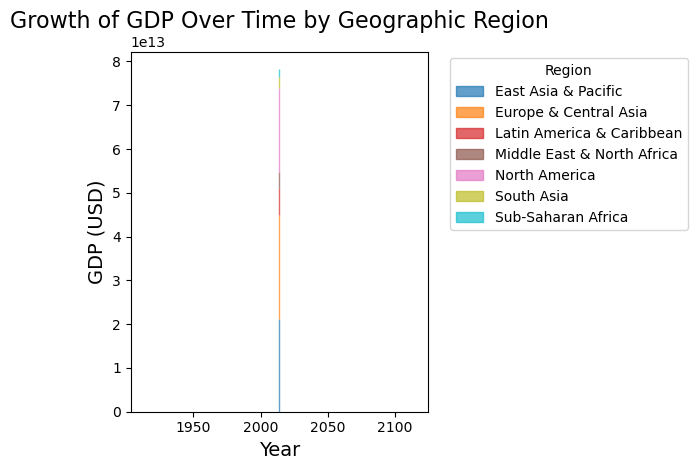

In [78]:
#Create a stacked area chart showing the growth of GDP over time, with each stack representing a geographic region.


# Grouping by Year and Region and summing the GDP values
gdp_by_region = merged_data.groupby(['Year', 'Region'])['GDP (USD)'].sum().unstack(fill_value=0)

# Create a stacked area chart
plt.figure(figsize=(14, 8))
gdp_by_region.plot(kind='area', stacked=True, alpha=0.7, colormap='tab10')

# Adding labels and title
plt.title('Growth of GDP Over Time by Geographic Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP (USD)', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

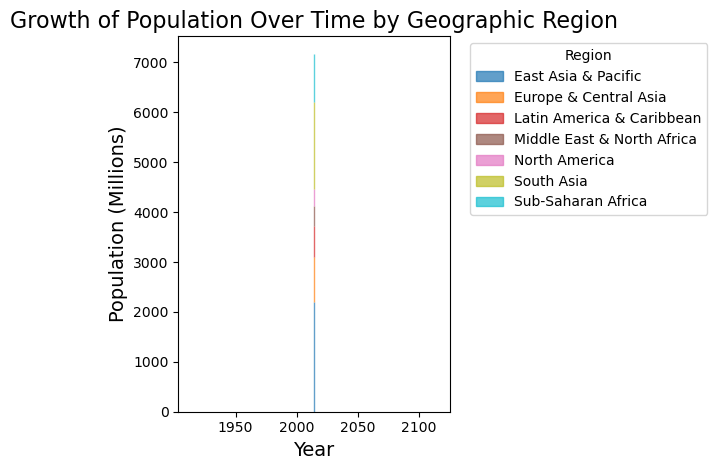

In [79]:
# Step 1: Calculate Population in Millions
worldbank['Population (M)'] = (worldbank['GDP (USD)'] / worldbank['GDP per capita (USD)']) / 1_000_000

# Step 2: Filter the data for 2014 and merge with HDI data
worldbank_2014 = worldbank[worldbank['Year'] == 2014]
merged_data = pd.merge(worldbank_2014, hdi, on='Country Code', how='inner')

# Step 3: Check if "Population (M)" column is in merged_data
if 'Population (M)' not in merged_data.columns:
    print("Population (M) column is missing in the merged_data DataFrame.")
else:
    # Step 4: Grouping by Year and Region and summing the Population values
    pop_by_region = merged_data.groupby(['Year', 'Region'])['Population (M)'].sum().unstack(fill_value=0)

    # Step 5: Create a stacked area chart
    plt.figure(figsize=(14, 8))
    pop_by_region.plot(kind='area', stacked=True, alpha=0.7, colormap='tab10')

    # Adding labels and title
    plt.title('Growth of Population Over Time by Geographic Region', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Population (Millions)', fontsize=14)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.tight_layout()
    plt.show()


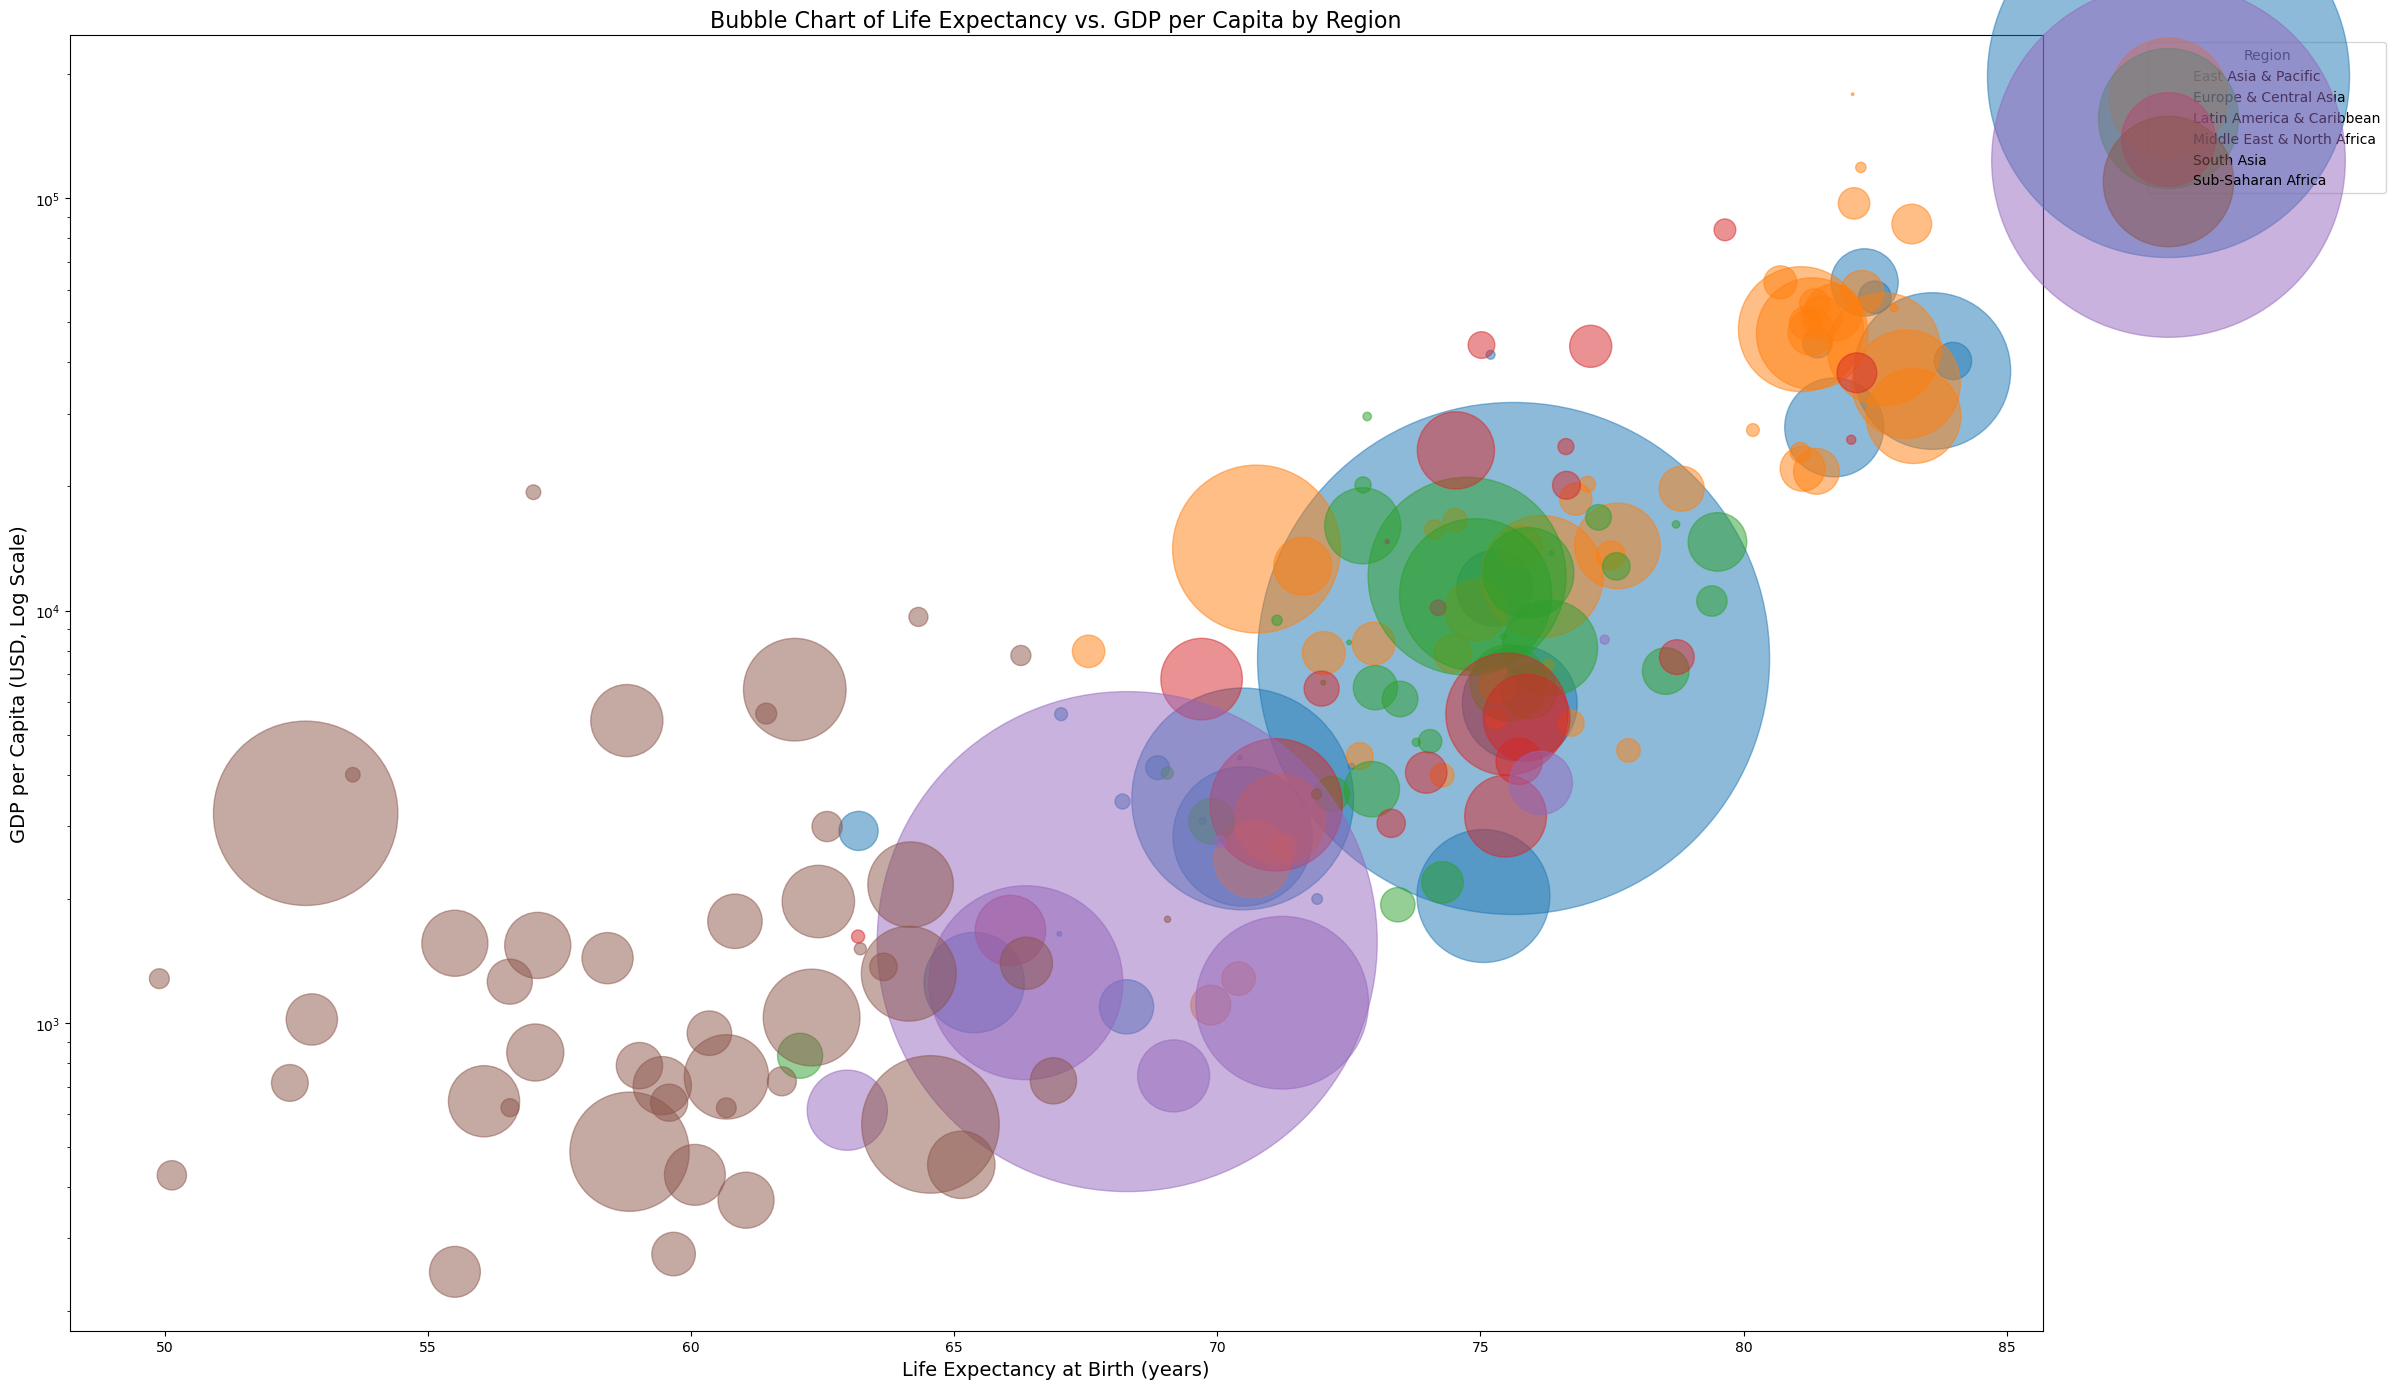

In [91]:
#Create a bubble chart with life expectancy for each country in the x-axis, 
# GDP per capita in the y-axis (log scale), and population as the bubble size. 
# Color the bubbles by region using the same colors for each as in the previous charts.


# Step 1: Calculate Population in Millions if not already done
worldbank['Population (M)'] = (worldbank['GDP (USD)'] / worldbank['GDP per capita (USD)']) / 1_000_000

# Step 2: Filter the merged_data for necessary columns
bubble_data = merged_data[['Country Name', 'Region', 'Life expectancy at birth (years)', 
                            'GDP per capita (USD)', 'Population (M)']]

# Step 3: Create the bubble chart
plt.figure(figsize=(24, 14))

# Step 4: Use a colormap for regions
colors = {
    'East Asia & Pacific': 'tab:blue',
    'Europe & Central Asia': 'tab:orange',
    'Latin America & Caribbean': 'tab:green',
    'Middle East & North Africa': 'tab:red',
    'South Asia': 'tab:purple',
    'Sub-Saharan Africa': 'tab:brown'
}

# Step 5: Create a scatter plot
for region, color in colors.items():
    region_data = bubble_data[bubble_data['Region'] == region]
    plt.scatter(
        region_data['Life expectancy at birth (years)'],
        region_data['GDP per capita (USD)'],
        s=region_data['Population (M)'] * 100,  # Scale the bubble size
        alpha=0.5,
        label=region,
        color=color
    )

# Step 6: Log scale for GDP per capita
plt.yscale('log')

# Step 7: Adding titles and labels
plt.title('Bubble Chart of Life Expectancy vs. GDP per Capita by Region', fontsize=16)
plt.xlabel('Life Expectancy at Birth (years)', fontsize=14)
plt.ylabel('GDP per Capita (USD, Log Scale)', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 8: Show the plot
plt.tight_layout()
plt.show()

Average HDI by Region:
Region
Sub-Saharan Africa            0.542745
South Asia                    0.639125
Latin America & Caribbean     0.740485
East Asia & Pacific           0.742296
Middle East & North Africa    0.750000
Europe & Central Asia         0.856627
North America                 0.928500
Name: hdi_2021, dtype: float64


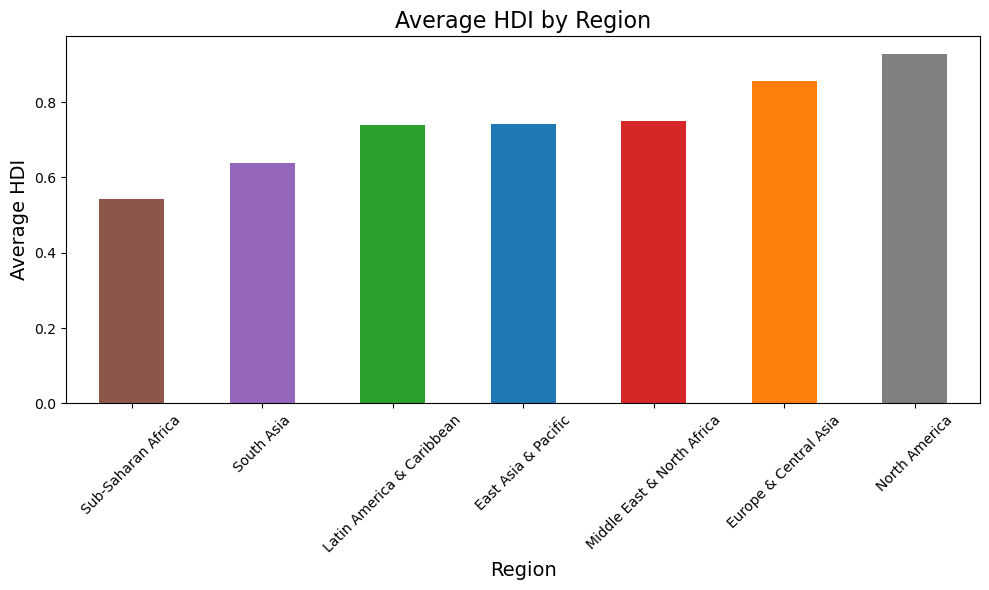

In [57]:
# Create a bar chart to show average HDI by region (make sure the region colors match).


# Step 1: Calculate average HDI by region
average_hdi = merged_data.groupby('Region')['hdi_2021'].mean().sort_values()

# Step 2: Print average_hdi for verification
print("Average HDI by Region:")
print(average_hdi)

# Step 3: Define colors for each region
colors = {
    'East Asia & Pacific': 'tab:blue',
    'Europe & Central Asia': 'tab:orange',
    'Latin America & Caribbean': 'tab:green',
    'Middle East & North Africa': 'tab:red',
    'South Asia': 'tab:purple',
    'Sub-Saharan Africa': 'tab:brown'
}

# Step 4: Create the bar chart
plt.figure(figsize=(10, 6))
# Match colors with average_hdi regions
average_hdi.plot(kind='bar', color=[colors.get(region, 'gray') for region in average_hdi.index])

# Step 5: Adding titles and labels
plt.title('Average HDI by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average HDI', fontsize=14)

# Step 6: Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

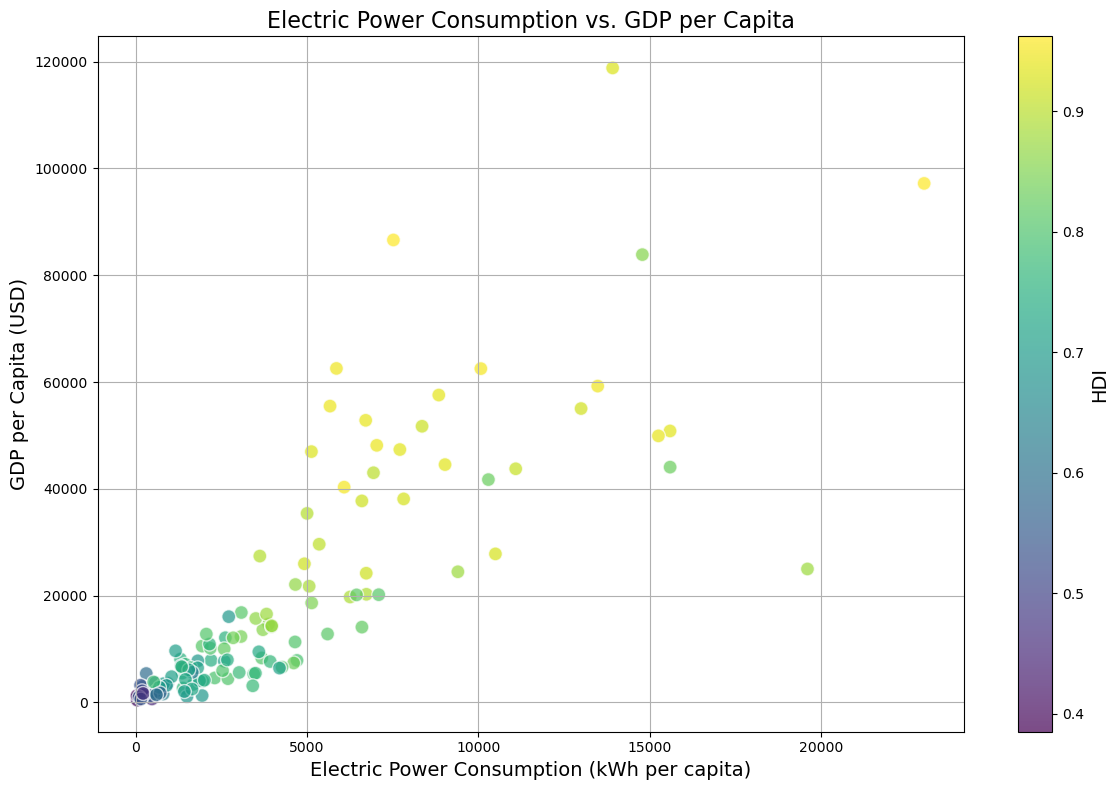

In [59]:
# Create a scatterplot with power consumption in the x-axis and GDP per capita in the y-axis, 
# then use HDI as a color scale for the dots (make sure to remove outliers like Iceland).

# Step 1: Filter out outliers (e.g., Iceland)
filtered_data = merged_data[merged_data['Country Name'] != 'Iceland']

# Step 2: Create a scatter plot
plt.figure(figsize=(12, 8))

# Use 'Electric power consumption (kWh per capita)' for the x-axis,
# 'GDP per capita (USD)' for the y-axis, and 'hdi_2021' for the color scale.
sc = plt.scatter(
    filtered_data['Electric power consumption (kWh per capita)'],
    filtered_data['GDP per capita (USD)'],
    c=filtered_data['hdi_2021'],  # Color by HDI
    cmap='viridis',  # Color map
    alpha=0.7,  # Transparency
    edgecolor='w',  # White edges for better visibility
    s=100  # Size of the dots
)

# Step 3: Add color bar to represent HDI
cbar = plt.colorbar(sc)
cbar.set_label('HDI', fontsize=14)

# Step 4: Adding titles and labels
plt.title('Electric Power Consumption vs. GDP per Capita', fontsize=16)
plt.xlabel('Electric Power Consumption (kWh per capita)', fontsize=14)
plt.ylabel('GDP per Capita (USD)', fontsize=14)

# Step 5: Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()


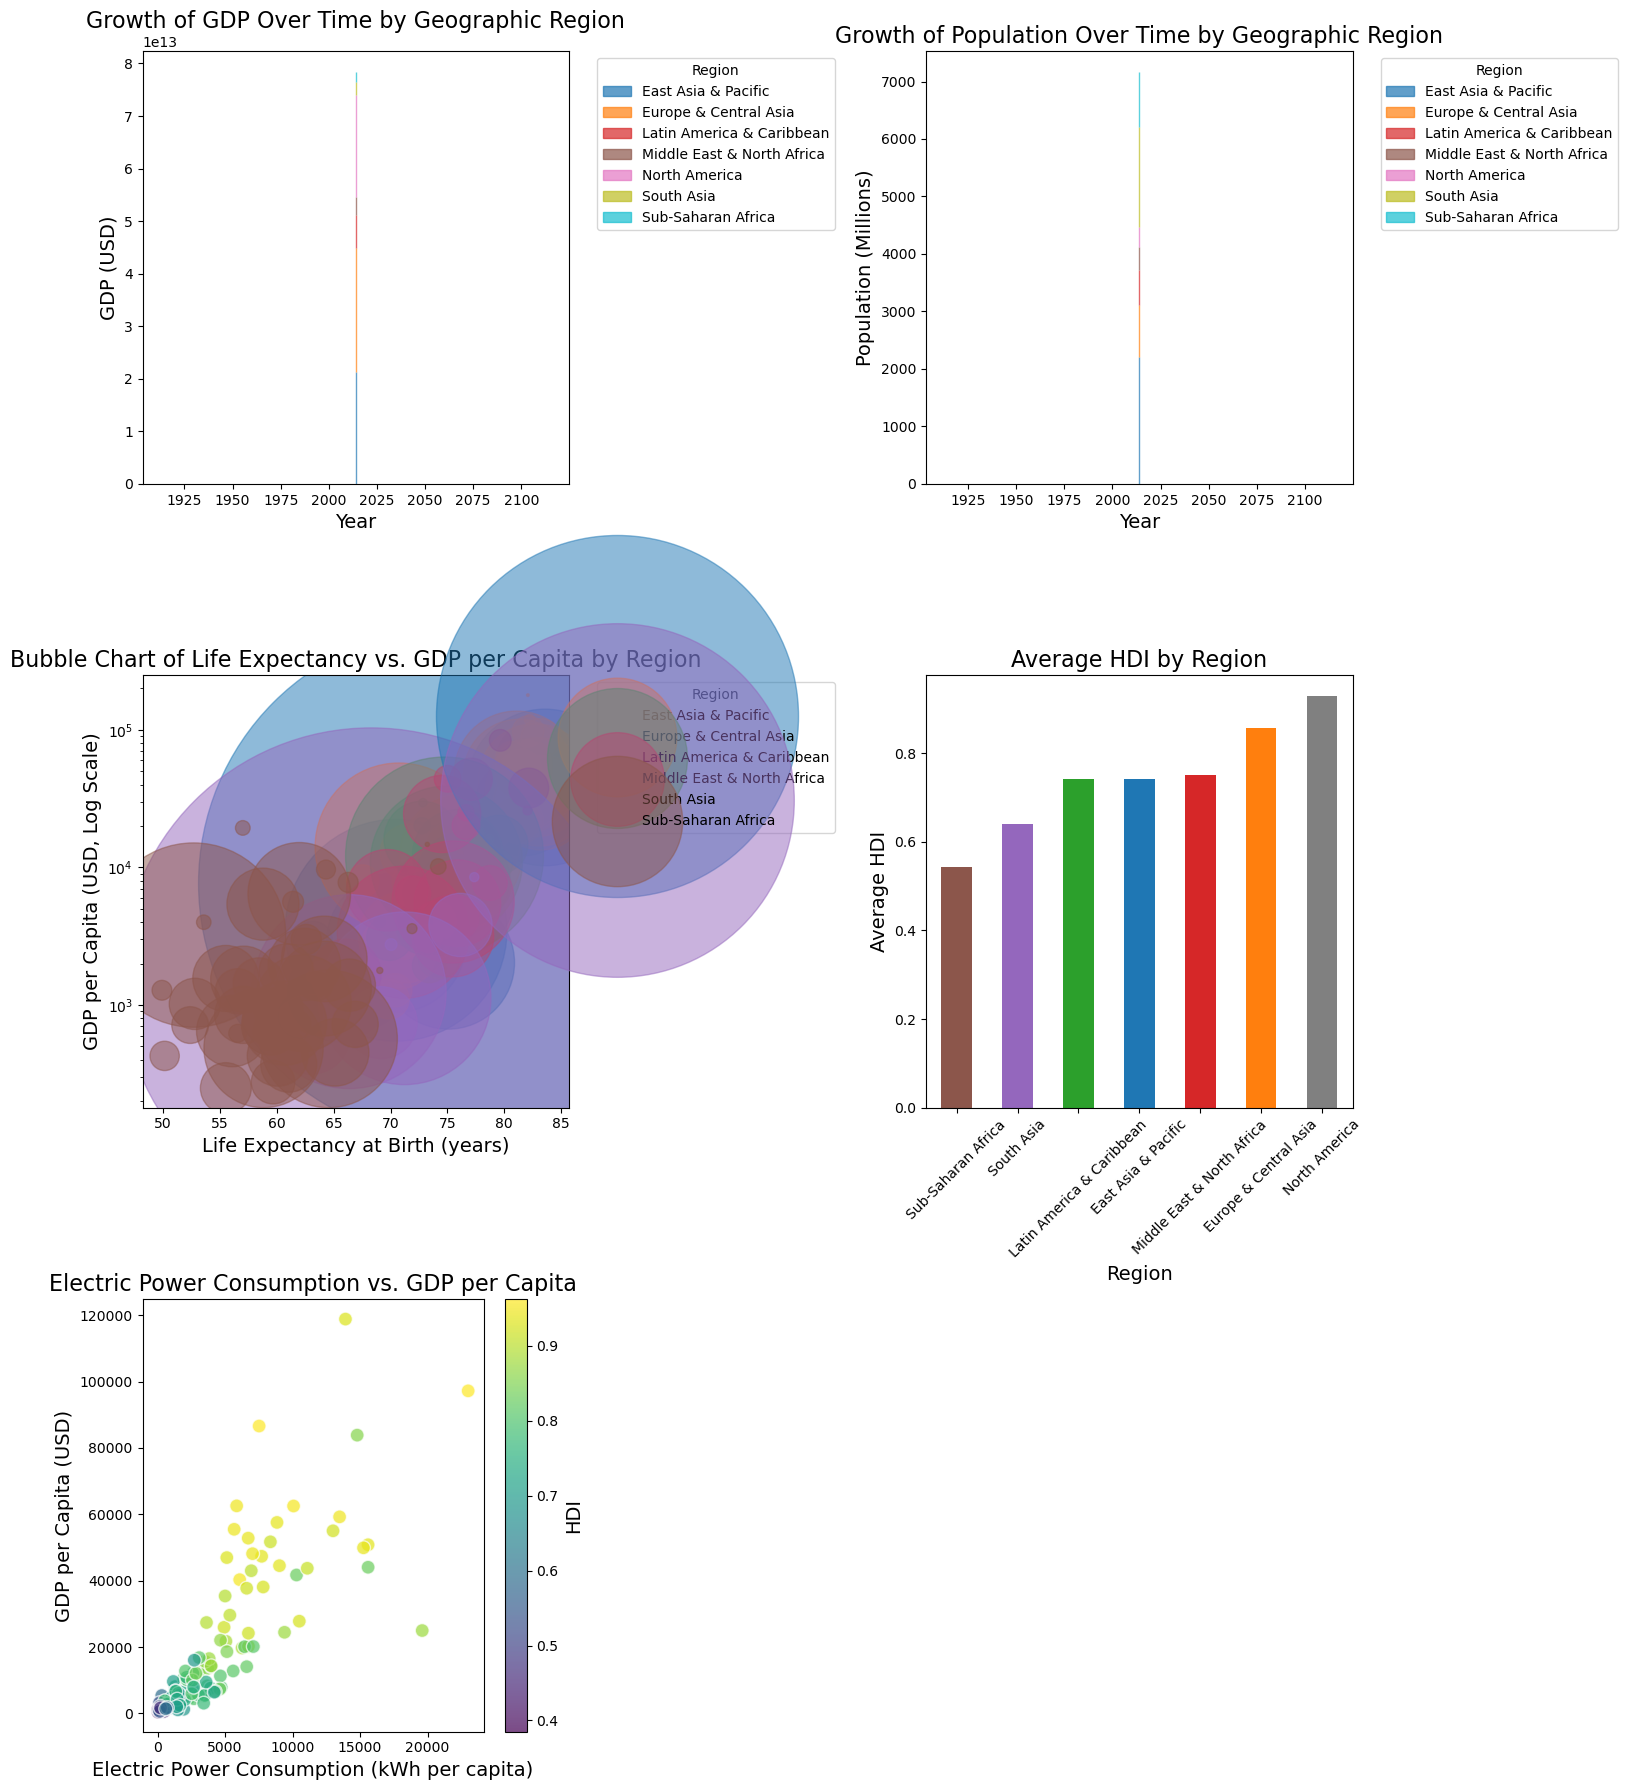

In [61]:

# Build Final Report 

# Assemble the 5 visualizations you have created into a single page (or figure).


import matplotlib.pyplot as plt
import pandas as pd

# Set the figure size for the overall plot
fig, axs = plt.subplots(3, 2, figsize=(16, 18))  # Create a grid of 3 rows and 2 columns

# 1. Stacked Area Chart for GDP Growth by Region
gdp_by_region = merged_data.groupby(['Year', 'Region'])['GDP (USD)'].sum().unstack(fill_value=0)
gdp_by_region.plot(kind='area', stacked=True, alpha=0.7, colormap='tab10', ax=axs[0, 0])
axs[0, 0].set_title('Growth of GDP Over Time by Geographic Region', fontsize=16)
axs[0, 0].set_xlabel('Year', fontsize=14)
axs[0, 0].set_ylabel('GDP (USD)', fontsize=14)
axs[0, 0].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Stacked Area Chart for Population Growth by Region
pop_by_region = merged_data.groupby(['Year', 'Region'])['Population (M)'].sum().unstack(fill_value=0)
pop_by_region.plot(kind='area', stacked=True, alpha=0.7, colormap='tab10', ax=axs[0, 1])
axs[0, 1].set_title('Growth of Population Over Time by Geographic Region', fontsize=16)
axs[0, 1].set_xlabel('Year', fontsize=14)
axs[0, 1].set_ylabel('Population (Millions)', fontsize=14)
axs[0, 1].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Bubble Chart for Life Expectancy vs. GDP per Capita
bubble_data = merged_data[['Country Name', 'Region', 'Life expectancy at birth (years)', 
                            'GDP per capita (USD)', 'Population (M)']]
colors = {
    'East Asia & Pacific': 'tab:blue',
    'Europe & Central Asia': 'tab:orange',
    'Latin America & Caribbean': 'tab:green',
    'Middle East & North Africa': 'tab:red',
    'South Asia': 'tab:purple',
    'Sub-Saharan Africa': 'tab:brown'
}
for region, color in colors.items():
    region_data = bubble_data[bubble_data['Region'] == region]
    axs[1, 0].scatter(
        region_data['Life expectancy at birth (years)'],
        region_data['GDP per capita (USD)'],
        s=region_data['Population (M)'] * 100,
        alpha=0.5,
        label=region,
        color=color
    )
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Bubble Chart of Life Expectancy vs. GDP per Capita by Region', fontsize=16)
axs[1, 0].set_xlabel('Life Expectancy at Birth (years)', fontsize=14)
axs[1, 0].set_ylabel('GDP per Capita (USD, Log Scale)', fontsize=14)
axs[1, 0].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Bar Chart for Average HDI by Region
average_hdi = merged_data.groupby('Region')['hdi_2021'].mean().sort_values()
average_hdi.plot(kind='bar', ax=axs[1, 1], color=[colors.get(region, 'gray') for region in average_hdi.index])
axs[1, 1].set_title('Average HDI by Region', fontsize=16)
axs[1, 1].set_xlabel('Region', fontsize=14)
axs[1, 1].set_ylabel('Average HDI', fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# 5. Scatter Plot for Power Consumption vs. GDP per Capita
filtered_data = merged_data[merged_data['Country Name'] != 'Iceland']
sc = axs[2, 0].scatter(
    filtered_data['Electric power consumption (kWh per capita)'],
    filtered_data['GDP per capita (USD)'],
    c=filtered_data['hdi_2021'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='w',
    s=100
)
cbar = plt.colorbar(sc, ax=axs[2, 0])
cbar.set_label('HDI', fontsize=14)
axs[2, 0].set_title('Electric Power Consumption vs. GDP per Capita', fontsize=16)
axs[2, 0].set_xlabel('Electric Power Consumption (kWh per capita)', fontsize=14)
axs[2, 0].set_ylabel('GDP per Capita (USD)', fontsize=14)

# Hide the empty subplot if not used
axs[2, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()






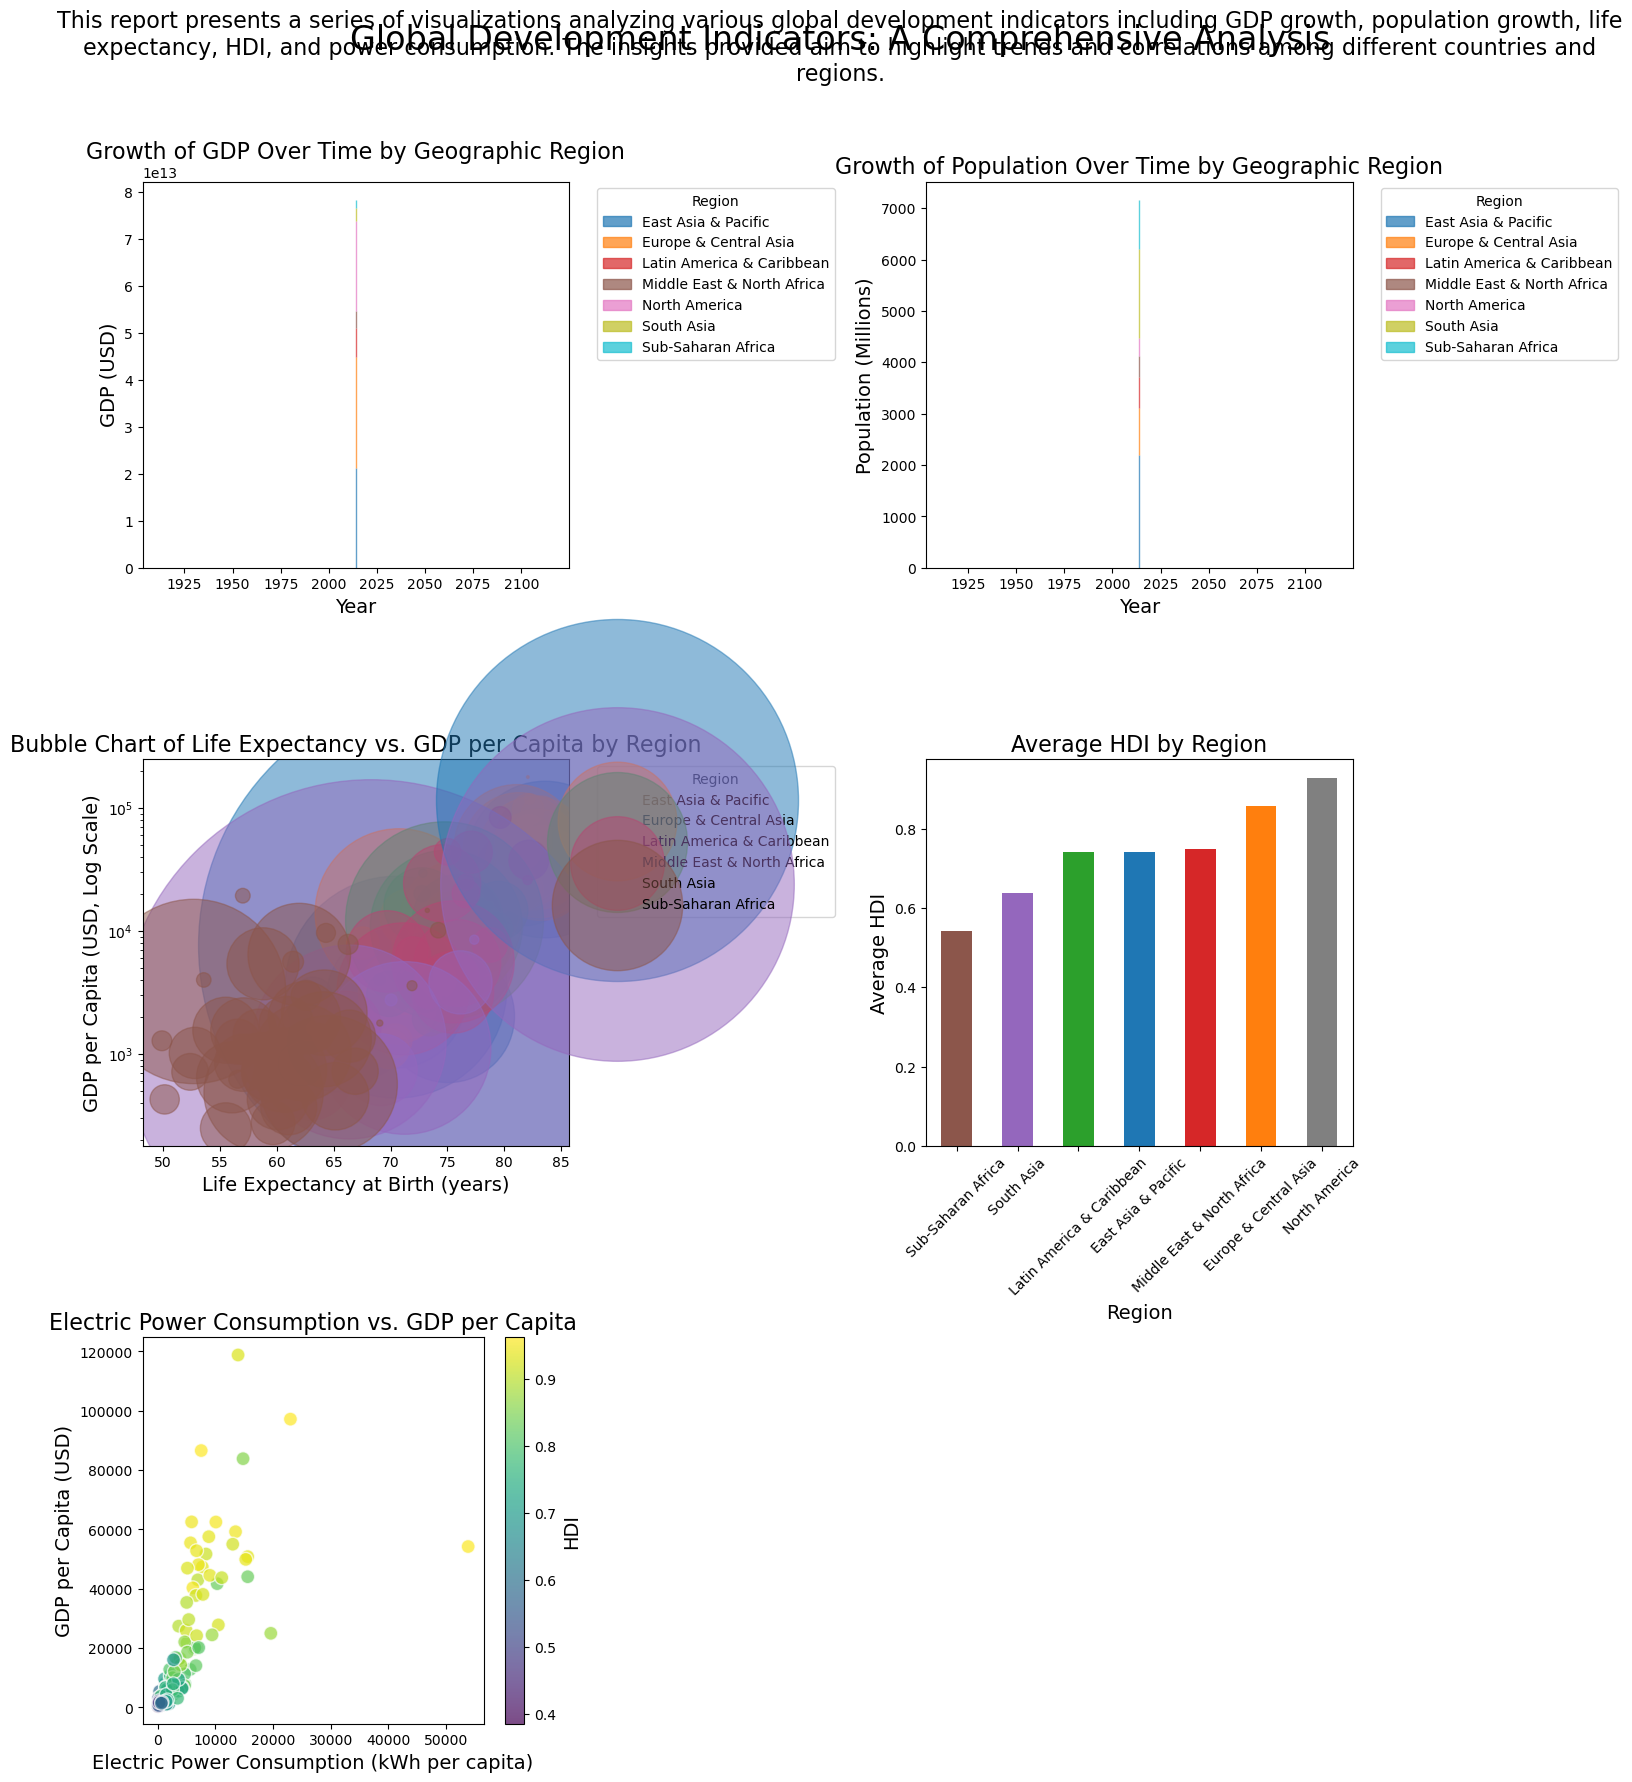

In [63]:
# Add an overall title and descriptive text to add context for the reader.

import matplotlib.pyplot as plt
import pandas as pd

# Set the figure size for the overall plot
fig, axs = plt.subplots(3, 2, figsize=(16, 18))  # Create a grid of 3 rows and 2 columns

# Overall Title
plt.suptitle('Global Development Indicators: A Comprehensive Analysis', fontsize=24)

# Descriptive Text
plt.figtext(0.5, 0.95, 
            'This report presents a series of visualizations analyzing various global development indicators including GDP growth, '
            'population growth, life expectancy, HDI, and power consumption. The insights provided aim to highlight trends and correlations '
            'among different countries and regions.',
            ha='center', fontsize=16, wrap=True)

# 1. Stacked Area Chart for GDP Growth by Region
gdp_by_region = merged_data.groupby(['Year', 'Region'])['GDP (USD)'].sum().unstack(fill_value=0)
gdp_by_region.plot(kind='area', stacked=True, alpha=0.7, colormap='tab10', ax=axs[0, 0])
axs[0, 0].set_title('Growth of GDP Over Time by Geographic Region', fontsize=16)
axs[0, 0].set_xlabel('Year', fontsize=14)
axs[0, 0].set_ylabel('GDP (USD)', fontsize=14)
axs[0, 0].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Stacked Area Chart for Population Growth by Region
pop_by_region = merged_data.groupby(['Year', 'Region'])['Population (M)'].sum().unstack(fill_value=0)
pop_by_region.plot(kind='area', stacked=True, alpha=0.7, colormap='tab10', ax=axs[0, 1])
axs[0, 1].set_title('Growth of Population Over Time by Geographic Region', fontsize=16)
axs[0, 1].set_xlabel('Year', fontsize=14)
axs[0, 1].set_ylabel('Population (Millions)', fontsize=14)
axs[0, 1].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Bubble Chart for Life Expectancy vs. GDP per Capita
bubble_data = merged_data[['Country Name', 'Region', 'Life expectancy at birth (years)', 
                            'GDP per capita (USD)', 'Population (M)']]
colors = {
    'East Asia & Pacific': 'tab:blue',
    'Europe & Central Asia': 'tab:orange',
    'Latin America & Caribbean': 'tab:green',
    'Middle East & North Africa': 'tab:red',
    'South Asia': 'tab:purple',
    'Sub-Saharan Africa': 'tab:brown'
}
for region, color in colors.items():
    region_data = bubble_data[bubble_data['Region'] == region]
    axs[1, 0].scatter(
        region_data['Life expectancy at birth (years)'],
        region_data['GDP per capita (USD)'],
        s=region_data['Population (M)'] * 100,
        alpha=0.5,
        label=region,
        color=color
    )
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Bubble Chart of Life Expectancy vs. GDP per Capita by Region', fontsize=16)
axs[1, 0].set_xlabel('Life Expectancy at Birth (years)', fontsize=14)
axs[1, 0].set_ylabel('GDP per Capita (USD, Log Scale)', fontsize=14)
axs[1, 0].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Bar Chart for Average HDI by Region
average_hdi = merged_data.groupby('Region')['hdi_2021'].mean().sort_values()
average_hdi.plot(kind='bar', ax=axs[1, 1], color=[colors.get(region, 'gray') for region in average_hdi.index])
axs[1, 1].set_title('Average HDI by Region', fontsize=16)
axs[1, 1].set_xlabel('Region', fontsize=14)
axs[1, 1].set_ylabel('Average HDI', fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# 5. Scatter Plot for Power Consumption vs. GDP per Capita
sc = axs[2, 0].scatter(
    merged_data['Electric power consumption (kWh per capita)'],
    merged_data['GDP per capita (USD)'],
    c=merged_data['hdi_2021'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='w',
    s=100
)
cbar = plt.colorbar(sc, ax=axs[2, 0])
cbar.set_label('HDI', fontsize=14)
axs[2, 0].set_title('Electric Power Consumption vs. GDP per Capita', fontsize=16)
axs[2, 0].set_xlabel('Electric Power Consumption (kWh per capita)', fontsize=14)
axs[2, 0].set_ylabel('GDP per Capita (USD)', fontsize=14)

# Hide the empty subplot if not used
axs[2, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()



Correlation between GDP per capita and HDI in 2014: 0.66
